# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv('api.env')
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\morro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")
print(api_key)

ebbc120258574bf8a055be05b3073c2b


In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi= NewsApiClient(api_key=api_key)
print(newsapi)

In [9]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin", language="en", page_size=100, sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 9767


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/saqib-shah',
 'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
 'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
 'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
 'publishedAt': '2021-06-09T12:04:40Z',
 'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"}

In [10]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(
    q="Ethereum",language="en", page_size=100, sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 2508


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Joseph Green',
 'title': 'This blockchain development course bundle is on sale for 97% off',
 'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
 'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
 'publishedAt': '2021-06-17T04:05:00Z',
 'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars

In [15]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(sentiments)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.8402,0.282,0.000,0.718
1,El Salvador has become the first country in th...,2021-06-09,0.1280,0.043,0.000,0.957
2,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.184,0.705
3,"It's all about clean energy, it seems. \r\nElo...",2021-06-14,0.6908,0.169,0.000,0.831
4,image captionThe move means bitcoin will be ac...,2021-06-09,0.2732,0.060,0.000,0.940


In [19]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df =pd.DataFrame(sentiments)
ethereum_df.head

<bound method NDFrame.head of                                                  text        date  compound  \
0   TL;DR: The Cryptocurrency with Ethereum and So...  2021-06-17    0.0000   
1   It wasn't long ago that your average person ha...  2021-06-20   -0.2960   
2   This article was translated from our Spanish e...  2021-06-10   -0.3400   
3   Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...  2021-07-02    0.3612   
4   Ether holders have "staked" more than $13 bill...  2021-07-05    0.7717   
..                                                ...         ...       ...   
95  The US is the country most prepared for widesp...  2021-07-01    0.6361   
96  This article was translated from our Spanish e...  2021-06-14   -0.3400   
97  Salvadorans from the El Zonte community have b...  2021-06-22    0.0000   
98  What happened\r\nThe price of popular cryptocu...  2021-06-24    0.6369   
99  Reddit Inc. co-founder Alexis Ohanian has rais...  2021-06-10    0.1280   

    positive  negativ

In [20]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.034601,0.045420,0.031360,0.923210
std,0.352095,0.061332,0.047192,0.070594
min,-0.778300,0.000000,0.000000,0.705000
25%,-0.238025,0.000000,0.000000,0.871000
50%,0.000000,0.000000,0.000000,0.927500
75%,0.318200,0.083250,0.064750,1.000000
max,0.840200,0.282000,0.184000,1.000000


In [21]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.00000
mean,0.158875,0.058580,0.02007,0.92137
std,0.355953,0.069982,0.03278,0.06987
min,-0.571900,0.000000,0.00000,0.71000
25%,0.000000,0.000000,0.00000,0.87525
50%,0.051350,0.041000,0.00000,0.92700
75%,0.449475,0.098250,0.04800,1.00000
max,0.848100,0.290000,0.11700,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum is Higher

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [22]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import reuters, stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [23]:
# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\morro\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\morro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\morro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\morro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()



# Define function
def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    word = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in word]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output
# Create a list of stopwords
lemmatizer.lemmatize('they')
lemmatizer.lemmatize('the')
lemmatizer.lemmatize('was')


print(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'said', 'mln', 'kilolitres','kl'}
second_result = [word.lower() for word in word if word.lower() not in sw.union(sw_addon)]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

NameError: name 'word' is not defined

In [32]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in sw, words))
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    return tokens

In [33]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df["tokens"]=bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.8402,0.282,0.000,0.718,"[El, Salvador, 's, President, Nayib, Bukele, m..."
1,El Salvador has become the first country in th...,2021-06-09,0.1280,0.043,0.000,0.957,"[El, Salvador, become, first, country, world, ..."
2,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.184,0.705,"[Filed, supply, chain, attack, reached, thousa..."
3,"It's all about clean energy, it seems. \r\nElo...",2021-06-14,0.6908,0.169,0.000,0.831,"['s, clean, energy, seems, Elon, Musk, Tesla, ..."
4,image captionThe move means bitcoin will be ac...,2021-06-09,0.2732,0.060,0.000,0.940,"[image, captionThe, move, mean, bitcoin, accep..."


In [35]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!


ethereum_df["tokens"]=ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,TL;DR: The Cryptocurrency with Ethereum and So...,2021-06-17,0.0000,0.000,0.000,1.000,"[TL, DR, Cryptocurrency, Ethereum, Solidity, B..."
1,It wasn't long ago that your average person ha...,2021-06-20,-0.2960,0.000,0.061,0.939,"[n't, long, ago, average, person, clue, NFT, N..."
2,This article was translated from our Spanish e...,2021-06-10,-0.3400,0.000,0.066,0.934,"[article, translated, Spanish, edition, using,..."
3,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,2021-07-02,0.3612,0.110,0.041,0.849,"[Bitcoin, Ethereum, Yuriko, Nakao, Ether, over..."
4,"Ether holders have ""staked"" more than $13 bill...",2021-07-05,0.7717,0.194,0.000,0.806,"[Ether, holder, ``, staked, '', 13, billion, w..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [36]:
from collections import Counter
from nltk import ngrams

In [38]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 19),
 (('El', 'Salvador'), 18),
 (('char', 'Reuters'), 15),
 (('Reuters', 'Staff'), 15),
 (('Bitcoin', 'world'), 13),
 (('previous', 'close'), 12),
 (('close', 'Bitcoin'), 12),
 (('biggest', 'best-known'), 12),
 (('21', 'Reuters'), 12),
 (('legal', 'tender'), 11),
 (('best-known', 'cryptocurrency'), 11),
 (('taken', 'June'), 11),
 (('bitcoin', 'legal'), 10),
 (('illustration', 'taken'), 10),
 (('June', '21'), 10),
 (('char', 'Bitcoin'), 9),
 (('world', "'s"), 9),
 (('2021', 'REUTERS/Edgar'), 9),
 (('Elon', 'Musk'), 7),
 (('Bitcoin', 'cryptocurrency'), 7)]

In [43]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [41]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 15),
 (('previous', 'close'), 12),
 (('close', 'Bitcoin'), 12),
 (('Bitcoin', 'world'), 12),
 (('biggest', 'best-known'), 12),
 (('best-known', 'cryptocurrency'), 11),
 (('char', 'Reuters'), 10),
 (('Reuters', 'Staff'), 10),
 (('taken', 'June'), 9),
 (('world', "'s"), 8),
 (('non-fungible', 'token'), 8),
 (('illustration', 'taken'), 8),
 (("'s", 'biggest'), 7),
 (('World', 'Wide'), 7),
 (('Wide', 'Web'), 7),
 (('char', 'Opinions'), 7),
 (('Opinions', 'expressed'), 7),
 (('expressed', 'Entrepreneur'), 7),
 (('Entrepreneur', 'contributor'), 7),
 (('char', 'Bitcoin'), 6)]

In [44]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 97),
 ('Bitcoin', 75),
 ('Reuters', 57),
 ('June', 44),
 ("'s", 35),
 ('bitcoin', 35),
 ('cryptocurrency', 31),
 ('El', 26),
 ('world', 23),
 ('…', 22)]

In [45]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(ethereum_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 99),
 ('Bitcoin', 48),
 ('Reuters', 35),
 ('cryptocurrency', 33),
 ('June', 29),
 ('…', 19),
 ('world', 19),
 ("'s", 19),
 ('2021', 17),
 ('Ethereum', 15)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [50]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

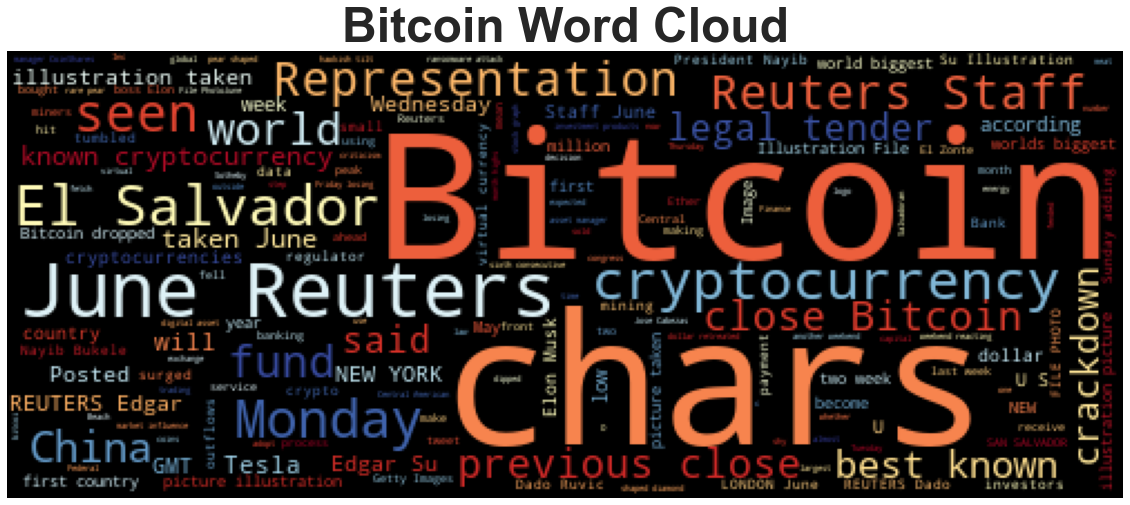

In [51]:
wordcloud(bitcoin_df.text.str.cat(), title="Bitcoin Word Cloud")

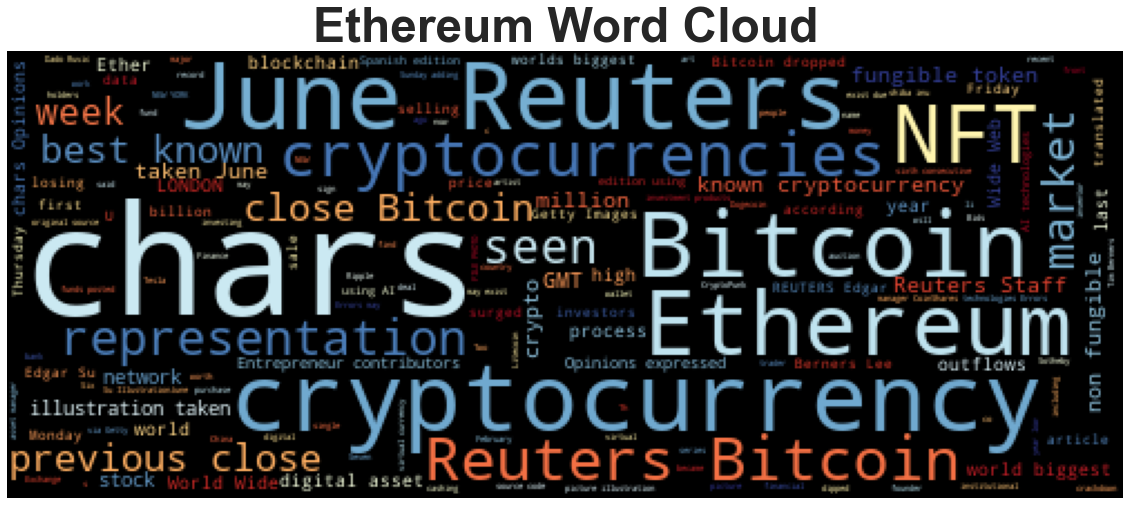

In [52]:
wordcloud(ethereum_df.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [53]:
import spacy
from spacy import displacy
from nltk.corpus import reuters
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [48]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [54]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [55]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = bitcoin_df.text.str.cat()
all_btc_text

'El Salvador\'s President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country\'s congress voted to accept the cryptocurrency by a majori… [+1414 chars]El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]image captionThe move means bitcoin will be accepted everywhere for goods and services, alongside the US dollar\r\nEl Salvador ha

In [59]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_btc_text )
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Bitcoin Model NER"

In [60]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent',jupyter=True)

In [62]:
# List all Entities
# YOUR CODE HERE!
#print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])
for ent in doc.ents:
    print(ent.text, ent.label_)

El Salvador's GPE
Nayib Bukele PERSON
Central American NORP
Salvador ORG
first ORDINAL
Nayib Bukele PERSON
Wednesday DATE
Citizens ORG
Alex Castro PERSON
Verge ORG
Three days DATE
the holiday weekend DATE
Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
US GPE
El Salvador GPE
first ORDINAL
Bitcoin PERSON
Miami GPE
Florida GPE
last weekend DATE
covid-19 PERSON
Larry Cermak PERSON
Mary-Ann RussonBusiness PERSON
BBC News ORG
US GPE
Donald Trump PERSON
Fox Business ORG
Bitcoin PERSON
US GPE
$70m MONEY
£50.5m MONEY
Bitcoin PERSON
SALVADOR ORG
June 16 DATE
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
Central American NORP
June 23 DATE
Reuters ORG
El Salvador GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
Bitcoin PERSON
May 20, 2021 DATE
Reuters ORG
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
the Central American LOC
Colonial Pipeline ORG
JBS ORG
up t

---

### Ethereum NER

In [63]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = ethereum_df.text.str.cat()
all_eth_text

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars]It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars]This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars]Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds aroun

In [65]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_eth_text )
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Ethereum Model NER"

In [66]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style='ent',jupyter=True)

In [67]:
# List all Entities
# YOUR CODE HERE!
#print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])
for ent in doc.ents:
    print(ent.text, ent.label_)

21.25 MONEY
June 17 DATE
97% PERCENT
NFT ORG
hundreds of thousands CARDINAL
Spanish NORP
AI ORG
Last May DATE
Buterin PERSON
27 CARDINAL
Ethereum ORG
Yuriko Nakao PERSON
Friday DATE
more than $13 billion MONEY
2.0 CARDINAL
Photothek/Getty Images PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
Tim Berners-Lee PERSON
NFT ORG
Sotheby's ORG
NFT ORG
Ethereum ORG
Keep Network ORG
Last week DATE
NFT ORG
as much as CARDINAL
90 percent PERCENT
recent weeks DATE
recent months DATE
8.54 % PERCENT
36,265 MONEY
Wednesday DATE
2,853.31 MONEY
Bitcoin PERSON
30.8% PERCENT
year DATE
27,734 MONEY
Jan. DATE
5.71% PERCENT
35,210 MONEY
0600 CARDINAL
GMT ORG
Saturday DATE
2,131.11 MONEY
Bitcoin PERSON
45.7% PERCENT
2021 DATE
6 MONEY
Getty Images
Investors ORG
the third week DATE
February 2018 DATE
9.83 % PERCENT
22:05 CARDINAL
GMT ORG
Sunday DATE
3,492.71 MONEY
Bitcoin PERSON
40.7% PERCENT
year DATE
27 MONEY
Reuters ORG
June 25 DATE
Reuters ORG
8.51% PERCENT
31,699.8

---